[Methods](#Methods)

[Synchrony](#Synchrony)

[Information transmission](#Information_transmission)

[Synchrony and information transmission](#syncinfo)

[PRC](#PRC)

In [1]:
# import libs
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

# 0. Methods <a id="Methods"></a>

## Fig2: INSI

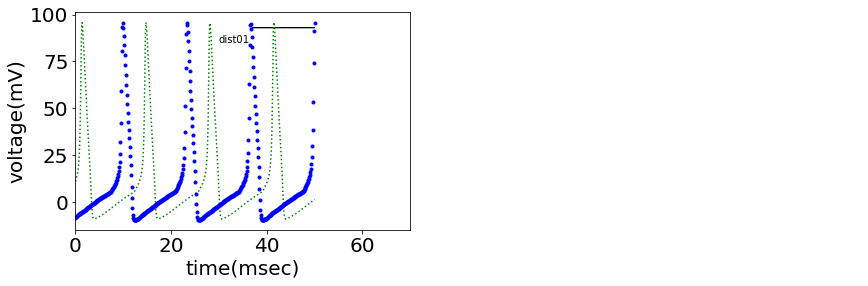

In [120]:
DATA = np.loadtxt("datas/signalinjection&firingrate/Take7/Neuronal activities/cir_fix/fixinit_run=0_Gprime=8_Tau=6_Tauprime=7.txt")
# plt.plot(DATA[:1000,0],"r:")
plt.plot(np.linspace(0,50,500), DATA[:500,1], "g:")
plt.plot(np.linspace(0,50,500), DATA[:500,2], "b.")

# plt.annotate(s="", xytext=(36,93), xy=(50,93), arrowprops=dict(arrowstyle='<->'))
plt.text(30, 85,"dist01",{"fontsize":10})
plt.arrow(x=37, y=93, dx=13, dy=0, )

plt.annotate(s="period", xytext=(12.98,96), xy=(165,96), arrowprops=dict(arrowstyle='<->', color="red"))

plt.xlabel("time(msec)")
plt.ylabel("voltage(mV)")
plt.xlim([0,70])

plt.rcParams.update({'font.size': 20})
plt.savefig("INSI.pdf", bbox_inches="tight")

## Fig3: F-I curve

In [7]:
# I_exts = np.concatenate((np.linspace(0,350,350//2),np.flip(np.linspace(0,350,350//2),axis=0)),axis=0)
I_exts = np.arange(500)

In [8]:
oneneuron = HHnets(motif="one")
resone = oneneuron.F_I(I_ext_interval=I_exts)

Initialised the network motif: one


In [ ]:
oneneuron.firingrate()

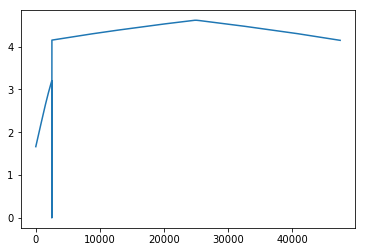

In [15]:
plt.plot(resone[0])

In [10]:
resone.shape

(3, 47500)

In [16]:
min(np.where(resone>0)[0]) # decide the threshold

277

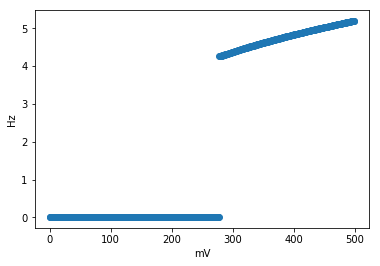

In [23]:
plt.scatter(range(500),resone)
plt.xlabel("mV")
plt.ylabel("Hz")
# plt.axvline(x=277,linestyle=":")
plt.savefig("F-I.eps")

## Fig 4: Aperiodic signal

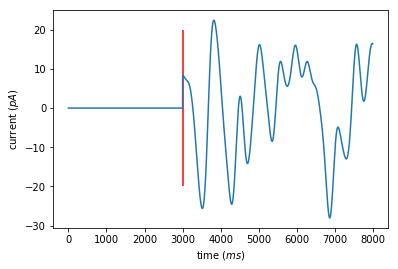

In [53]:
sig = np.load("datas/Convolved_whitenoise.npy")
sig[:300000] = 0
sig[300000:800000] = sig[300000:800000] - sig[300000:800000].mean()
Gaussian_white = sig[:800000]

plt.plot(np.linspace(0,8000,800000), Gaussian_white)
plt.vlines(x=3000,ymin=-20,ymax=20,color="r")
plt.xlabel(r"time $(ms)$")
plt.ylabel(r"current $(pA)$")
plt.savefig("aperiodic.pdf", bbox_inches="tight")

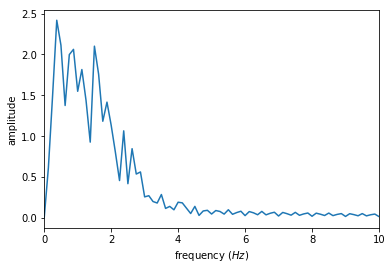

In [58]:
frate = 1000*100 # 1000 ms* 100 sample per 1ms

time = np.linspace(0,Gaussian_white.shape[-1]/frate, Gaussian_white.shape[-1])
w0 = np.abs(np.fft.rfft(Gaussian_white)/len(Gaussian_white))
freqs = np.fft.fftfreq(Gaussian_white.shape[-1]//2+1, d=time[1]-time[0])/2

plt.plot(np.fft.fftshift(freqs),np.fft.fftshift(w0))
plt.xlim([0,10])
plt.ylabel("amplitude")
plt.xlabel(r"frequency $(Hz)$")
plt.savefig("FFT_aperiodic.pdf", bbox_inches="tight")

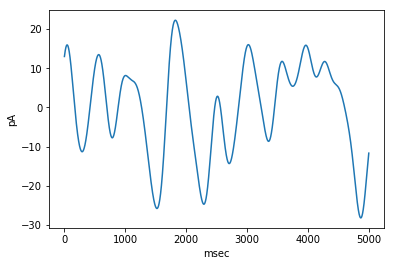

In [3]:
sig=np.load("datas/Convolved_whitenoise.npy")
Gaussian_white = sig[200000:700000]-sig[200000:700000].mean()
plt.plot(np.linspace(0,5000,500000), Gaussian_white)
plt.xlabel("msec")
plt.ylabel("pA")
plt.savefig("Aperiodic_signal.pdf")

## Fig 5: spiketrain and firingrate

In [3]:
onesig = HHnets(motif="one",init=[33])
spike = onesig.spiketrain(running_time=1000)
onesig = HHnets(motif="one",init=[33])
fire = onesig.firingrate(running_time=1000)

Initialised network with 1 neurons.
Initialised network with 1 neurons.


[Text(0, 0.5, 'Hz'), Text(0.5, 0, 'msec'), Text(0.5, 1.0, 'Firing rate')]

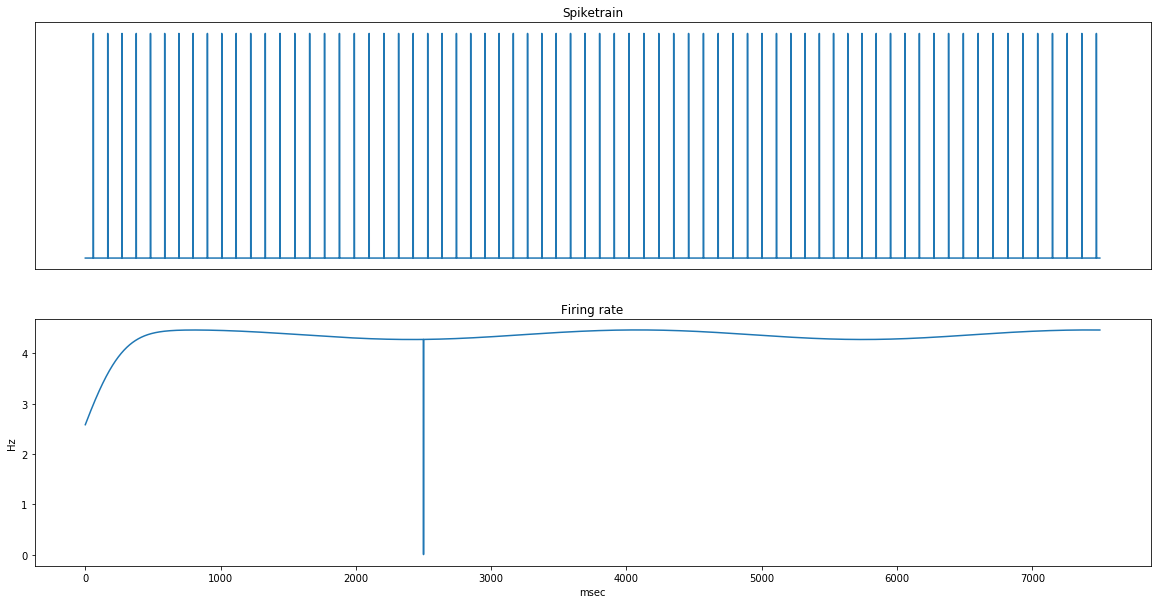

In [19]:
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
axes[0].plot(spike[0][:])
axes[1].plot(fire[0][:])
axes[0].set(title="Spiketrain",xticks=[],yticks=[])
axes[1].set(title="Firing rate", xlabel="msec", ylabel="Hz")
# plt.savefig("firingrate.eps")

(0.992, 1.002)

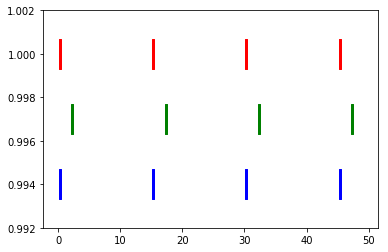

In [51]:

indicies = np.arange(50)
n0 = np.where(indicies%15==0, 1, 0)
n1 = np.where((indicies-2)%15==0, 0.997, 0)
plt.plot(n0, color="r", marker="$|$", linestyle="",markersize=30)
plt.plot(n1, color="g", marker="$|$", linestyle="",markersize=30)
plt.plot(n0-0.006, color="b", marker="$|$", linestyle="",markersize=30)
plt.ylim(0.992,1.002)

# 1. Synchrony <a id="Synchrony"></a>

## b) plot

### load saved datas

In [19]:
motif = "cir/fixinit"
DATA = np.load("datas/BAdata/Sync/"+motif+"/summary.npz")
diff01 = DATA["diff01"]
diff02 = DATA["diff02"]
stddist01 = DATA["stddist01"]
stddist02 = DATA["stddist02"]
stddist12 = DATA["stddist12"]
period = DATA["period"]

rel01 = diff01/period
rel02 = diff02/period
epsilon = 1
mask = (stddist01 > epsilon) | (stddist02 > epsilon) | (stddist12 > epsilon) # mask unstable networks
rel01[mask] = np.nan
rel02[mask] = np.nan

### V / chain motif

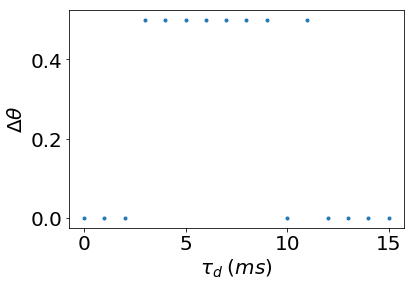

In [92]:
taus = np.arange(0,16,1)
# taus = range(10)

# plt.plot(taus, rel02, linestyle="", marker=".", label = r"$\Delta \theta_{02}$")
plt.plot(taus, rel01[::2], linestyle="", marker=".", label = r"$\Delta \theta_{01}$")

plt.xlabel(r"$\tau_d \; (ms)$")
# plt.xlabel(r"n-th trial")
plt.ylabel(r"$\Delta \theta$")
# plt.legend()

plt.rcParams.update({'font.size': 20})
plt.savefig("sync_twobi.pdf", bbox_inches="tight")

### twobi

### Circular motif

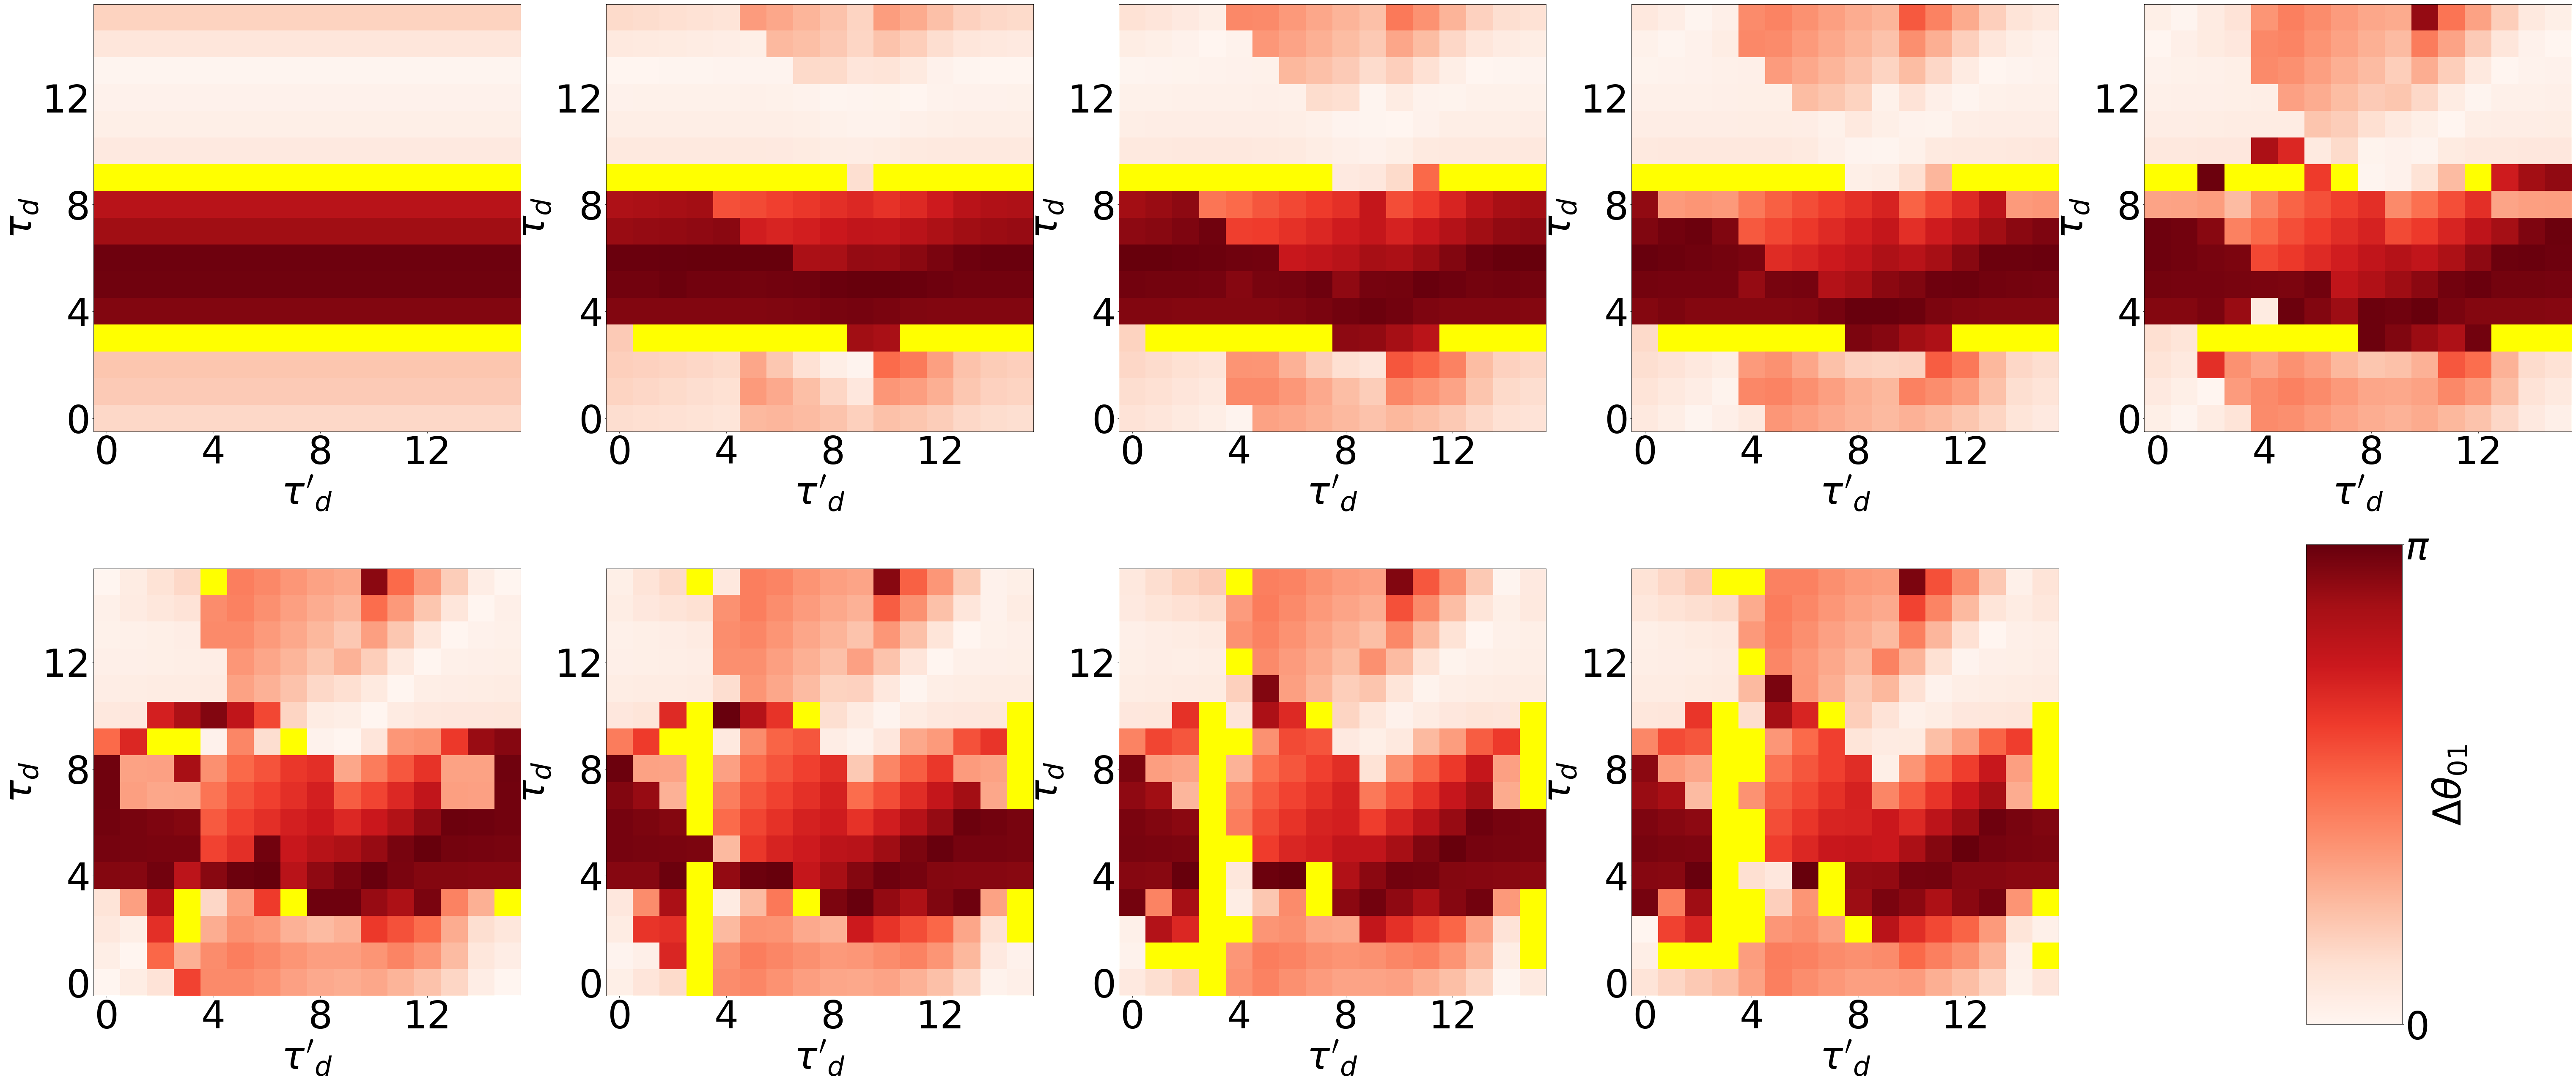

<Figure size 432x288 with 0 Axes>

In [90]:
# 1.control different parameters
distlim=[0,0.5] # phase difference is defined between 0(0) and pi(0.5)
fig = plt.figure(figsize=(105, 45))
axes={}
rel02cmap = plt.cm.get_cmap("Blues") # phase difference between two outer neurons
rel01cmap = plt.cm.get_cmap("Reds") # phase difference between one outer and inner neurons
rel02cmap.set_bad(color="yellow") # mark unstable regions with yellow color
rel01cmap.set_bad(color="yellow")

# 2.plot  
for gpi,gprime in enumerate(np.arange(0,18,2)): 
    ri = gpi//5
    ci = gpi%5
    axes[(ri,ci)] = plt.subplot2grid((2,5),(ri,ci)) #add axes
    
#     l1 = axes[ri,ci].imshow(rel02[gpi], cmap=rel02cmap, clim=distlim, origin="low")
#     axes[ri,ci].set(ylabel=r"$\tau_d$", xlabel=r"$\tau'_d$", 
#                     xticks=np.arange(0,16,4), yticks=np.arange(0,16,4))
#     axes[ri,ci].set_title(r"$G'_{syn}=%s$"%(gprime),pad=60)
    
    l2 = axes[ri,ci].imshow(rel01[gpi], cmap=rel01cmap, clim=distlim, origin="low")
    axes[ri,ci].set(ylabel=r"$\tau_d$", xlabel=r"$\tau'_d$", 
                    xticks=np.arange(0,16,4), yticks=np.arange(0,16,4))
    
# 3.colorbars and labels
# pos1 = fig.add_axes([0.817, 0.12, 0.03, 0.35])
# bar1 = fig.colorbar(l1,cax=pos1,shrink=0.8,ticks=distlim,aspect=10)
# bar1.set_label(r"$\Delta\theta_{02}$")
# bar1.set_ticklabels([r"$0$",r"$\pi$"])

pos2 = fig.add_axes([0.817, 0.12, 0.03, 0.35])
bar2 = fig.colorbar(l2,cax=pos2,shrink=0.8,ticks=distlim,aspect=10)
bar2.set_label(r"$\Delta\theta_{01}$")
bar2.set_ticklabels([r"$0$",r"$\pi$"])

matplotlib.rcParams.update({'font.size': 90})
plt.figure().tight_layout()

fig.savefig("sync_cir_01.pdf",bbox_inches="tight")    

## c) select few networks to plot

### selection

In [93]:
rel01 = diff01/period # INSI between [0,0.5]
rel02 = diff02/period
epsilon = 1 # threshold for stability of interspike distance
mask = (stddist01 > epsilon) | (stddist02 > epsilon) | (stddist12 > epsilon) # mask unstable networks
rel01[mask] = np.nan
rel02[mask] = np.nan

list_phase = [0,0.25,0.5,np.nan] # choose interesting phase differences
phase_ep = 0.03 # allowed error range of phase differences


# for phase_02 in list_phase:
#     for phase_01 in list_phase:
for phase_02 in [0.25]:
    for phase_01 in [0]:
        # figure out which networks have certain phase differences 
        print(np.where((rel01 < phase_01+phase_ep) & (rel01 > phase_01-phase_ep) & 
                 (rel02 < phase_02+phase_ep) & (rel02 > phase_02-phase_ep)))

(array([1]), array([2]), array([8]))


/home/minseok/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less
/home/minseok/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


### time trace

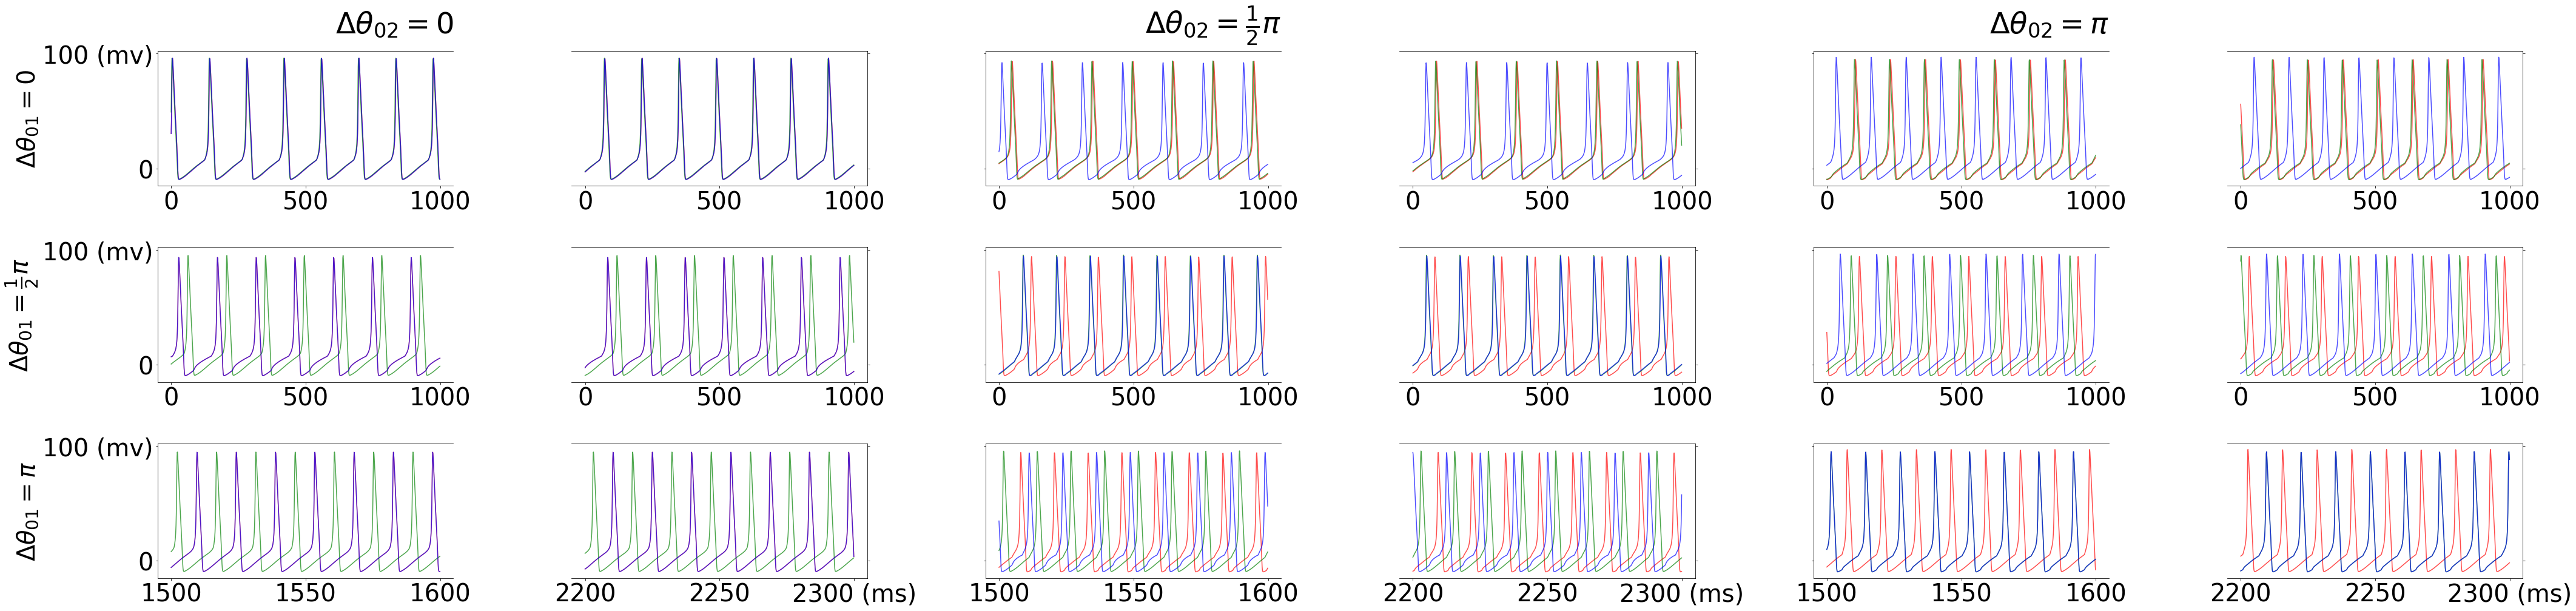

In [127]:
# 0.define different parameters
result = np.array([
    [[2,12,0],[2,2,8],[8,4,4]],
    [[8,2,12],[10,9,0],[6,8,4]],
    [[4,6,1],[12,3,13],[10,4,4]]
]) # select networks with certain phase differences (0,0.25,0.5)
datalength=50000
dict_phase = [r"$0$", r"$\frac{1}{2}\pi$", r"$\pi$"]

fig,axes = plt.subplots(nrows=3, ncols=6, figsize=(60,15), sharex=False, sharey=True)
for index_01,phase_01 in enumerate(result):
    for index_02,phase_02 in enumerate(phase_01):

        # 1.load data
        datapath = np.reshape(np.loadtxt("datas/signalinjection&firingrate/Take7/ \
        Neuronal activities/cir_fix/fixinit_run=0_Gprime={}_Tau={}_Tauprime={} \
         .txt".format(phase_02[0],phase_02[1],phase_02[2])), (-1,3))[:datalength]

        # 2.plot
        axes[index_01, index_02*2].plot(datapath[15000:16000,0],"r",alpha=0.7)
        axes[index_01, index_02*2].plot(datapath[15000:16000,1],"g",alpha=0.7)
        axes[index_01, index_02*2].plot(datapath[15000:16000,2],"b",alpha=0.7)

        axes[index_01, index_02*2+1].plot(datapath[22000:23000, 0], "r", alpha=0.7)
        axes[index_01, index_02*2+1].plot(datapath[22000:23000, 1], "g", alpha=0.7)
        axes[index_01, index_02*2+1].plot(datapath[22000:23000, 2], "b", alpha=0.7)

        # 3. set ticks and labels
        # hide the spines between ax1 and ax2 of the same network
        axes[index_01, index_02*2].spines['right'].set_visible(False)
        axes[index_01, index_02*2+1].spines["left"].set_visible(False)
        axes[index_01, index_02*2].yaxis.tick_left()
        axes[index_01, index_02*2].tick_params(labeltop='off')  # don't put tick labels at the top
        axes[index_01, index_02*2+1].yaxis.tick_right()

        axes[0, index_02*2].set_title(r"$\Delta\theta_{02}=$" + "{}".format(dict_phase[index_02]),
                                     loc="right",pad="30")
        
        axes[-1, index_02*2].set(xticklabels = ["blah", "1500", "1550", "1600"])
        axes[-1, index_02*2+1].set(xticklabels = ["blah","2200","2250","2300 (ms)"])
        axes[index_01, 0].set(ylabel=r"$\Delta\theta_{01}=$" + "{}".format(dict_phase[index_01]), yticklabels=["b","0","100 (mv)"])

fig.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.savefig("timetrace_rep.eps")


# 2. Information transmission <a id="Information_transmission"></a>


## c) plot

### load data

In [6]:
# parameter used for recording
runtime = 5000
cutoff = 3000
fr_cutoff = 500
sampling_rate = 10
dt = 0.01

In [3]:
# load firingrates and cross correlatins
motif="cir"
firingrates = np.load("datas/BAdata/info/firingrate/"+motif+"/firingrates.npy")
fr0fr2corrs = np.load("datas/BAdata/info/firingrate/"+motif+"/fr0fr2corrs.npy")
sigfr2corrs = np.load("datas/BAdata/info/firingrate/"+motif+"/sigfr2corrs.npy")
sigfr0corrs = np.load("datas/BAdata/info/firingrate/"+motif+"/sigfr0corrs.npy")

In [129]:
# load max datas
motif ="/chain/"
max02 = np.load("datas/BAdata/info/firingrate/"+motif+"/sum.npz")["maxfr0fr2corrs"]
maxs2 = np.load("datas/BAdata/info/firingrate"+motif+"/sum.npz")["maxsigfr2corrs"]
maxs0 = np.load("datas/BAdata/info/firingrate"+motif+"/sum.npz")["maxsigfr0corrs"]
argmax02 = np.load("datas/BAdata/info/firingrate"+motif+"/sum.npz")["maxposfr0fr2corrs"]
argmaxs2 = np.load("datas/BAdata/info/firingrate"+motif+"/sum.npz")["maxpossigfr2corrs"]
argmaxs0 = np.load("datas/BAdata/info/firingrate"+motif+"/sum.npz")["maxpossigfr0corrs"]

### raw firing rate

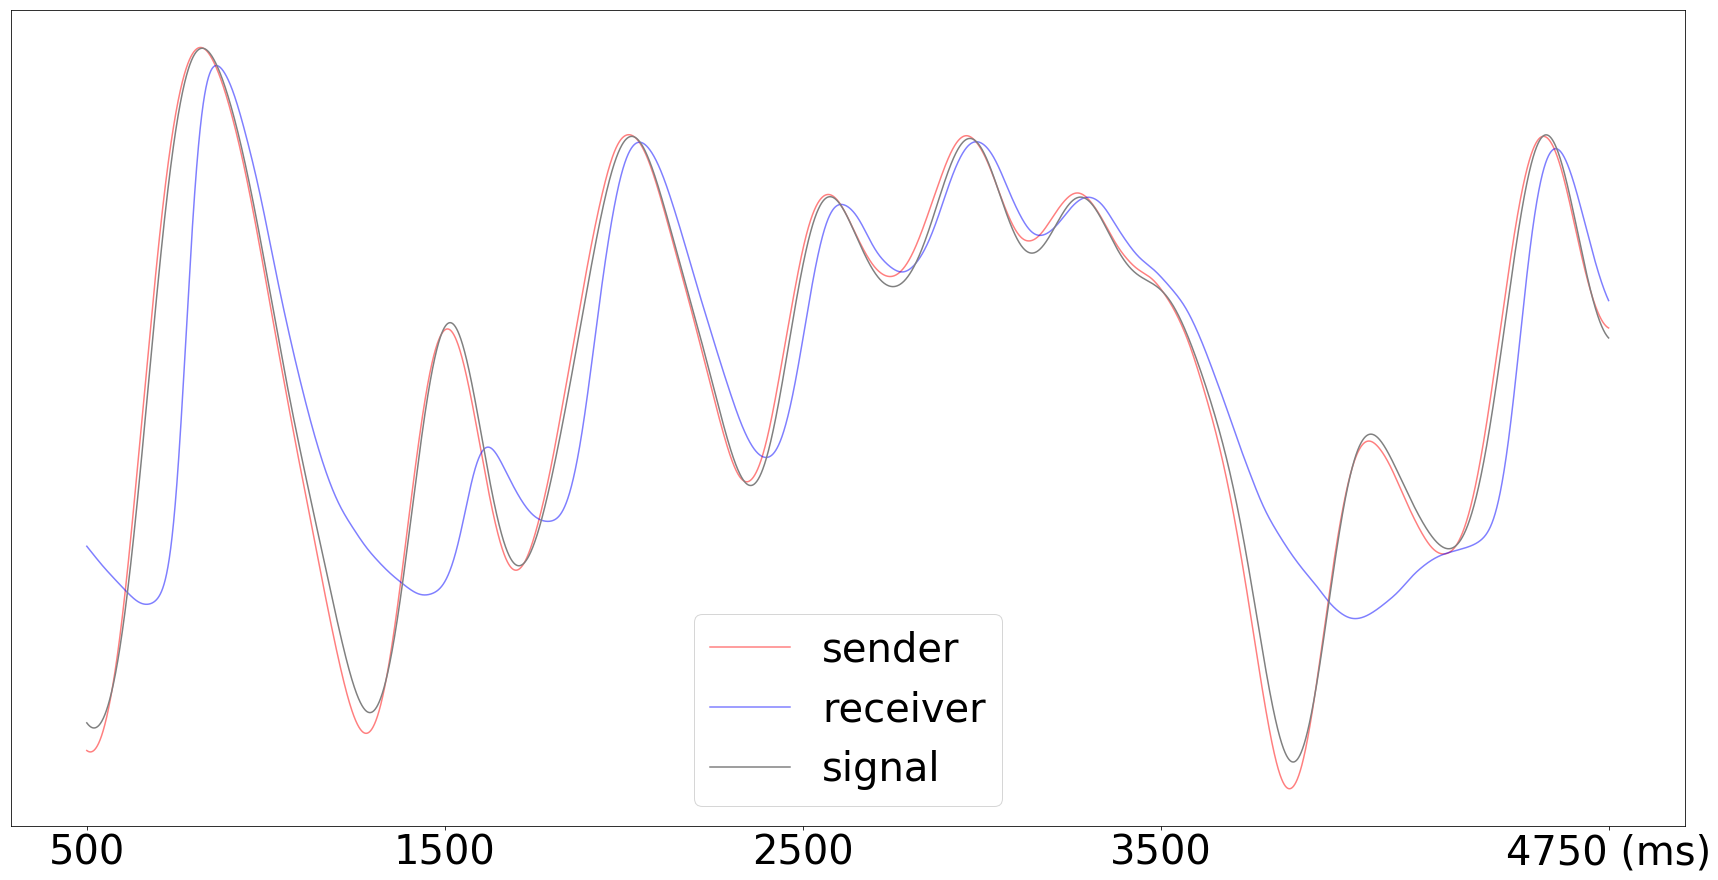

In [59]:
# 1.load signals
sig = np.load("datas/Convolved_whitenoise.npy")
sig = sig[np.arange(int((3000+fr_cutoff)/dt), int((3000+runtime-250)/dt), sampling_rate)] - \
      sig[np.arange(int((3000+fr_cutoff)/dt), int((3000+runtime-250)/dt), sampling_rate)].mean()


plt.figure(figsize=(30,15))
xtick = np.linspace(fr_cutoff, runtime-250, (runtime-250-fr_cutoff)*sampling_rate)
plt.plot(xtick, firingrates[0,0,fr_cutoff*sampling_rate:]-firingrates[0,0,fr_cutoff*sampling_rate:].mean(),
         "r", alpha=0.5, label="sender")
plt.plot(xtick, firingrates[0,2,fr_cutoff*sampling_rate:]-firingrates[2,0,fr_cutoff*sampling_rate:].mean(),
         "b", alpha=0.5, label="receiver")
plt.plot(xtick, sig/200, "gray", alpha=1, label="signal")
plt.xticks([500,1500,2500,3500,4750],[500,1500,2500,3500,"4750 (ms)"])
plt.yticks([])
plt.legend()

plt.rcParams.update({'font.size': 40})
plt.savefig("chain_firingrate.pdf", bbox_inches="tight")

[6,15,12](full,full)
[10,9,10](full,small)
[14,11,6]

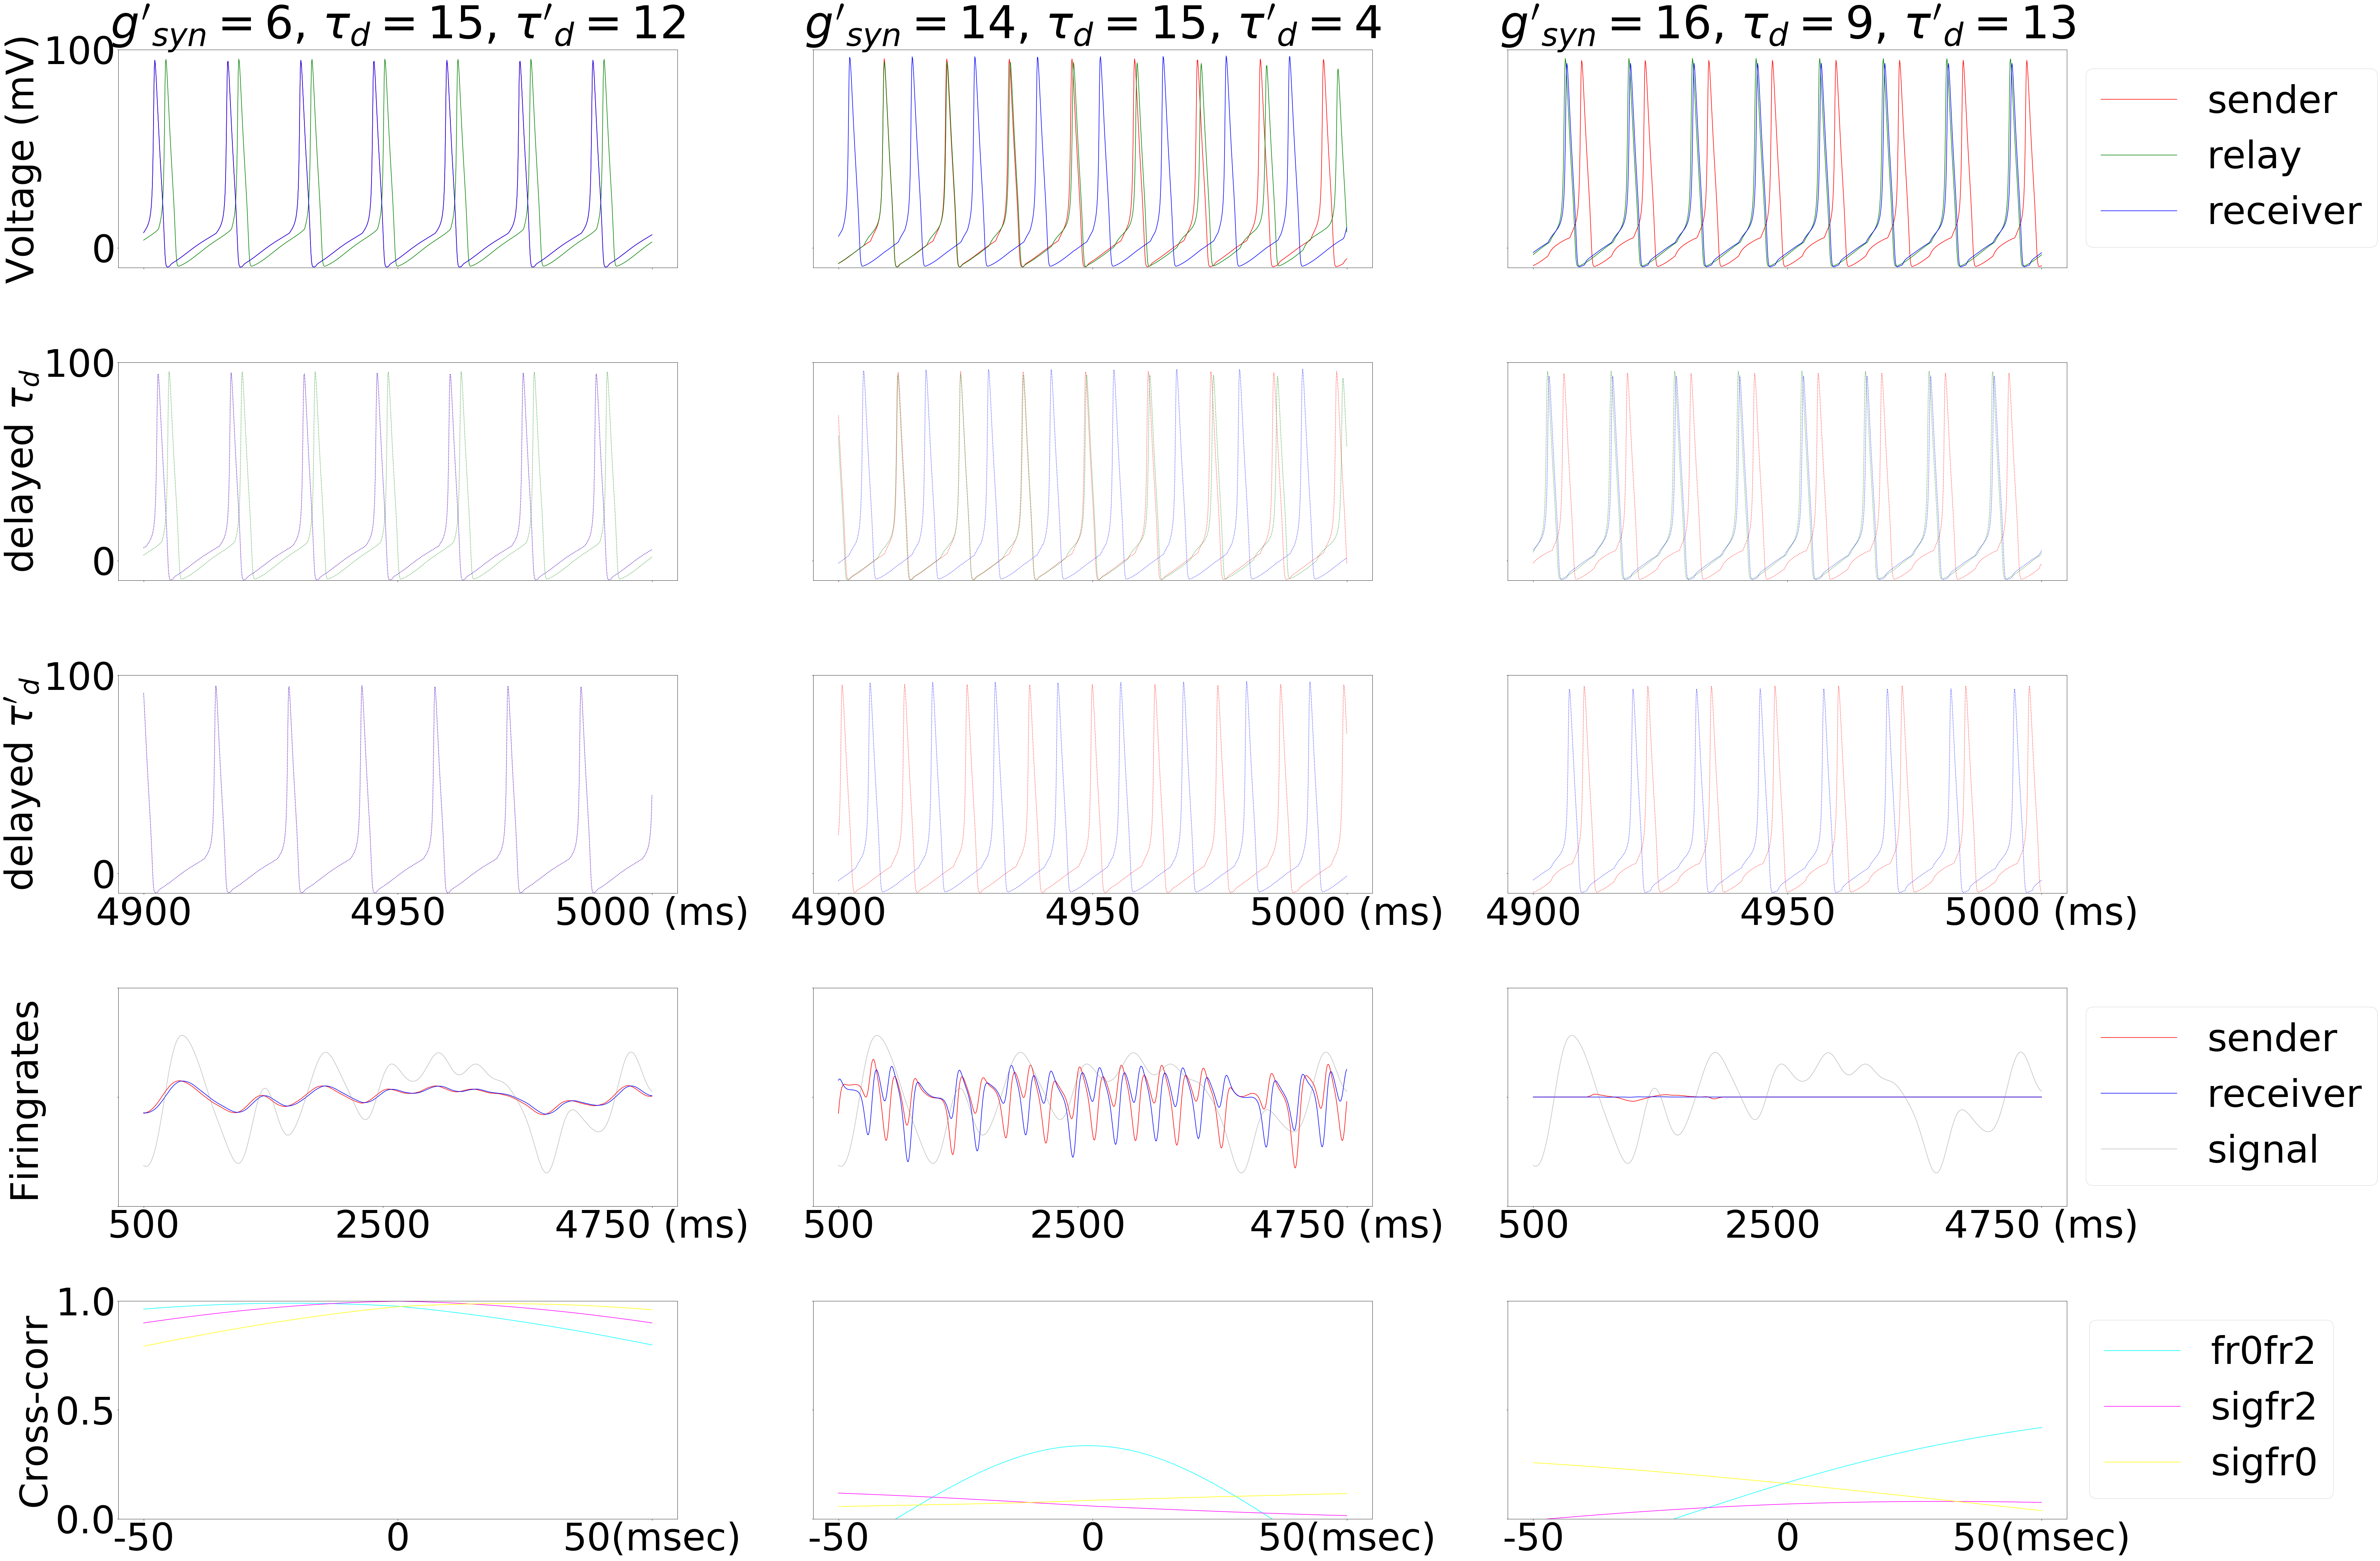

In [20]:
# 1.load signals
sig = np.load("datas/Convolved_whitenoise.npy")
sig = sig[np.arange(int((3000+fr_cutoff)/dt), int((3000+runtime-250)/dt), sampling_rate)] - \
      sig[np.arange(int((3000+fr_cutoff)/dt), int((3000+runtime-250)/dt), sampling_rate)].mean()

# 2.select certain networks
result = np.array([[6,15,12],[14,15,4],[16,9,13]
                  ])
#     [2,12,0],[2,2,8],[8,4,4]
#     [8,2,12],[10,9,0],[6,8,4]
#     [4,6,1],[12,3,13],[10,4,4]
# networks having 0,0.25,0.5 phase diffs
list_phase = [r"$0$", r"$\frac{1}{2}\pi$", r"$\pi$"]

fig,axes = plt.subplots(nrows=5, ncols=3, figsize=(90,60), sharex=False, sharey=False)
for index_01, phase_01 in enumerate(result):        
    # 3.Neuronal activities without signal
    DATAPATH = np.reshape(np.loadtxt("datas/signalinjection&firingrate/Take7/Neuronal activities/cir_fix/fixinit_run=0_Gprime={}_Tau={}_Tauprime={}.txt".format(phase_01[0],phase_01[1],phase_01[2])),
                          (-1,3))[:runtime*sampling_rate]
    xtick = np.linspace(4900,5000,100*sampling_rate)
    axes[0][index_01].plot(xtick, DATAPATH[4900*sampling_rate:,0], "r", label="sender")
    axes[0][index_01].plot(xtick, DATAPATH[4900*sampling_rate:,1], "g", label="relay")
    axes[0][index_01].plot(xtick, DATAPATH[4900*sampling_rate:,2], "b", label="receiver")
    axes[0][index_01].set_title(r"$g'_{syn}=$" + "{}".format(phase_01[0]) + r", $\tau_d=$" + 
                "{}".format(phase_01[1]) + r", $\tau'_d=$" + "{}".format(phase_01[2]), pad=30)
    axes[0][index_01].tick_params(labelleft=False, labelbottom=False)

#         pos0 = axes[5][index_01].get_position()
#         pos1 = axes[ 1][index_01].get_position()
#         points0 = pos0.get_points()
#         points1 = pos1.get_points()
#         points1[1][1] = points0[0][1]
#         pos1.set_points(points1)
#         axes[ 1][index_01].set_position(pos1)

    axes[ 1][index_01].plot(xtick, 
      DATAPATH[(4900-phase_01[1])*sampling_rate : (5000-phase_01[1])*sampling_rate, 0], "r:")
    axes[ 1][index_01].plot(xtick,
      DATAPATH[(4900 - phase_01[1]) * sampling_rate: (5000 - phase_01[1]) * sampling_rate, 1], "g:")
    axes[ 1][index_01].plot(xtick,
      DATAPATH[(4900 - phase_01[1]) * sampling_rate: (5000 - phase_01[1]) * sampling_rate, 2], "b:")
    axes[ 1][index_01].tick_params(labelleft=False, labelbottom=False)
    

    axes[ 2][index_01].plot(xtick,
       DATAPATH[(4900 - phase_01[2]) * sampling_rate: (5000 - phase_01[2]) * sampling_rate, 0], "r:")
    axes[ 2][index_01].plot(xtick,
       DATAPATH[(4900 - phase_01[2]) * sampling_rate: (5000 - phase_01[2]) * sampling_rate, 2], "b:")
    axes[ 2][index_01].tick_params(labelleft=False)
    axes[ 2][index_01].set(xticks=[4900,4950,5000], xticklabels=[4900,4950,"5000 (ms)"])

    # 4.firingrates and signal
    xtick = np.linspace(fr_cutoff, runtime-250, (runtime-250-fr_cutoff)*sampling_rate)
    new_phase_01 = copy.deepcopy(phase_01)
    new_phase_01[0] = phase_01[0]/2 # hard-coded to handle gprime and gpi discrepancy
    # plot firingrates of neurons
    axes[ 3][index_01].plot(xtick,
        firingrates[tuple(new_phase_01)][0,fr_cutoff*sampling_rate:] - 
        firingrates[tuple(new_phase_01)][0,fr_cutoff*sampling_rate:].mean(),
        "r", label="sender")
    axes[ 3][index_01].plot(xtick,
        firingrates[tuple(new_phase_01)][2,fr_cutoff*sampling_rate:] - 
        firingrates[tuple(new_phase_01)][2,fr_cutoff*sampling_rate:].mean(),
        "b", label="receiver")
    # plot signals
    axes[ 3][index_01].plot(xtick, sig/200,
        color="grey", alpha=0.5, label="signal")
    axes[ 3][index_01].tick_params(labelleft=False)
    axes[ 3][index_01].set(xticks=[500,2500,4750],xticklabels=[500,2500,"4750 (ms)"])

    # 5.Cross-correlations of firingrates
    xtick = np.linspace(-50,50,100*sampling_rate)
    half_length = fr0fr2corrs.shape[-1]//2

    axes[ 4][index_01].plot(xtick,
      fr0fr2corrs[tuple(new_phase_01)][half_length-50*sampling_rate:half_length+50*sampling_rate],
                                      color="cyan",label="fr0fr2")
    axes[ 4][index_01].plot(xtick,
      sigfr2corrs[tuple(new_phase_01)][half_length-50*sampling_rate:half_length+50*sampling_rate],
                                      color="magenta",label="sigfr2")
    axes[ 4][index_01].plot(xtick, 
      sigfr0corrs[tuple(new_phase_01)][half_length-50*sampling_rate:half_length+50*sampling_rate],
                                      color="yellow",label="sigfr0")
    axes[ 4][index_01].tick_params(labelleft=False)
    axes[ 4][index_01].set(xticks=[-50,0,50], xticklabels=[-50,0,"50(msec)"])

    # 6.setting labels and legends
    axes[ 0][index_01].set(ylim=[-10,100])
    axes[ 1][index_01].set(ylim=[-10,100])
    axes[ 2][index_01].set(ylim=[-10,100])
    axes[ 3][index_01].set(ylim=[-0.2,0.2])
    axes[ 4][index_01].set(ylim=[0,1])
        
axes[ 0][0].tick_params(labelleft=True)
axes[ 1][0].tick_params(labelleft=True)
axes[ 2][0].tick_params(labelleft=True)
axes[ 3][0].tick_params(labelbottom=True)
axes[ 4][0].tick_params(labelleft=True)

axes[ 0][0].set(ylabel="Voltage (mV)")
axes[ 1][0].set(ylabel=r"delayed $\tau_d$")
axes[ 2][0].set(ylabel=r"delayed $\tau'_d$")
axes[ 3][0].set_ylabel("Firingrates", labelpad=200)
axes[ 4][0].set(ylabel="Cross-corr")

axes[ 0][-1].legend(bbox_to_anchor=(1,1))
axes[ 3][-1].legend(bbox_to_anchor=(1,1))
axes[ 4][-1].legend(bbox_to_anchor=(1.51,1))
    
    
# 7.save the plot
plt.rcParams.update({'font.size': 100})
fig.tight_layout()
plt.savefig("raw_corr_example.pdf", bbox_inches="tight")

### Chain/V-motif

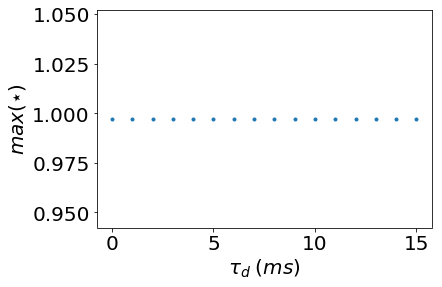

In [136]:
# plot delay on the x-axis and max/argmax of cross-correlation function on the y-axis
taus = range(16)
plt.plot(taus, maxs0, linestyle="", marker=".")

plt.xlabel(r"$\tau_d \; (ms)$")
# plt.ylabel(r"$argmax(\star)$ (ms)")
plt.ylabel(r"$max(\star)$")

plt.rcParams.update({'font.size': 20})
plt.savefig("info_chain_frs0.pdf", bbox_inches="tight")

### Circular

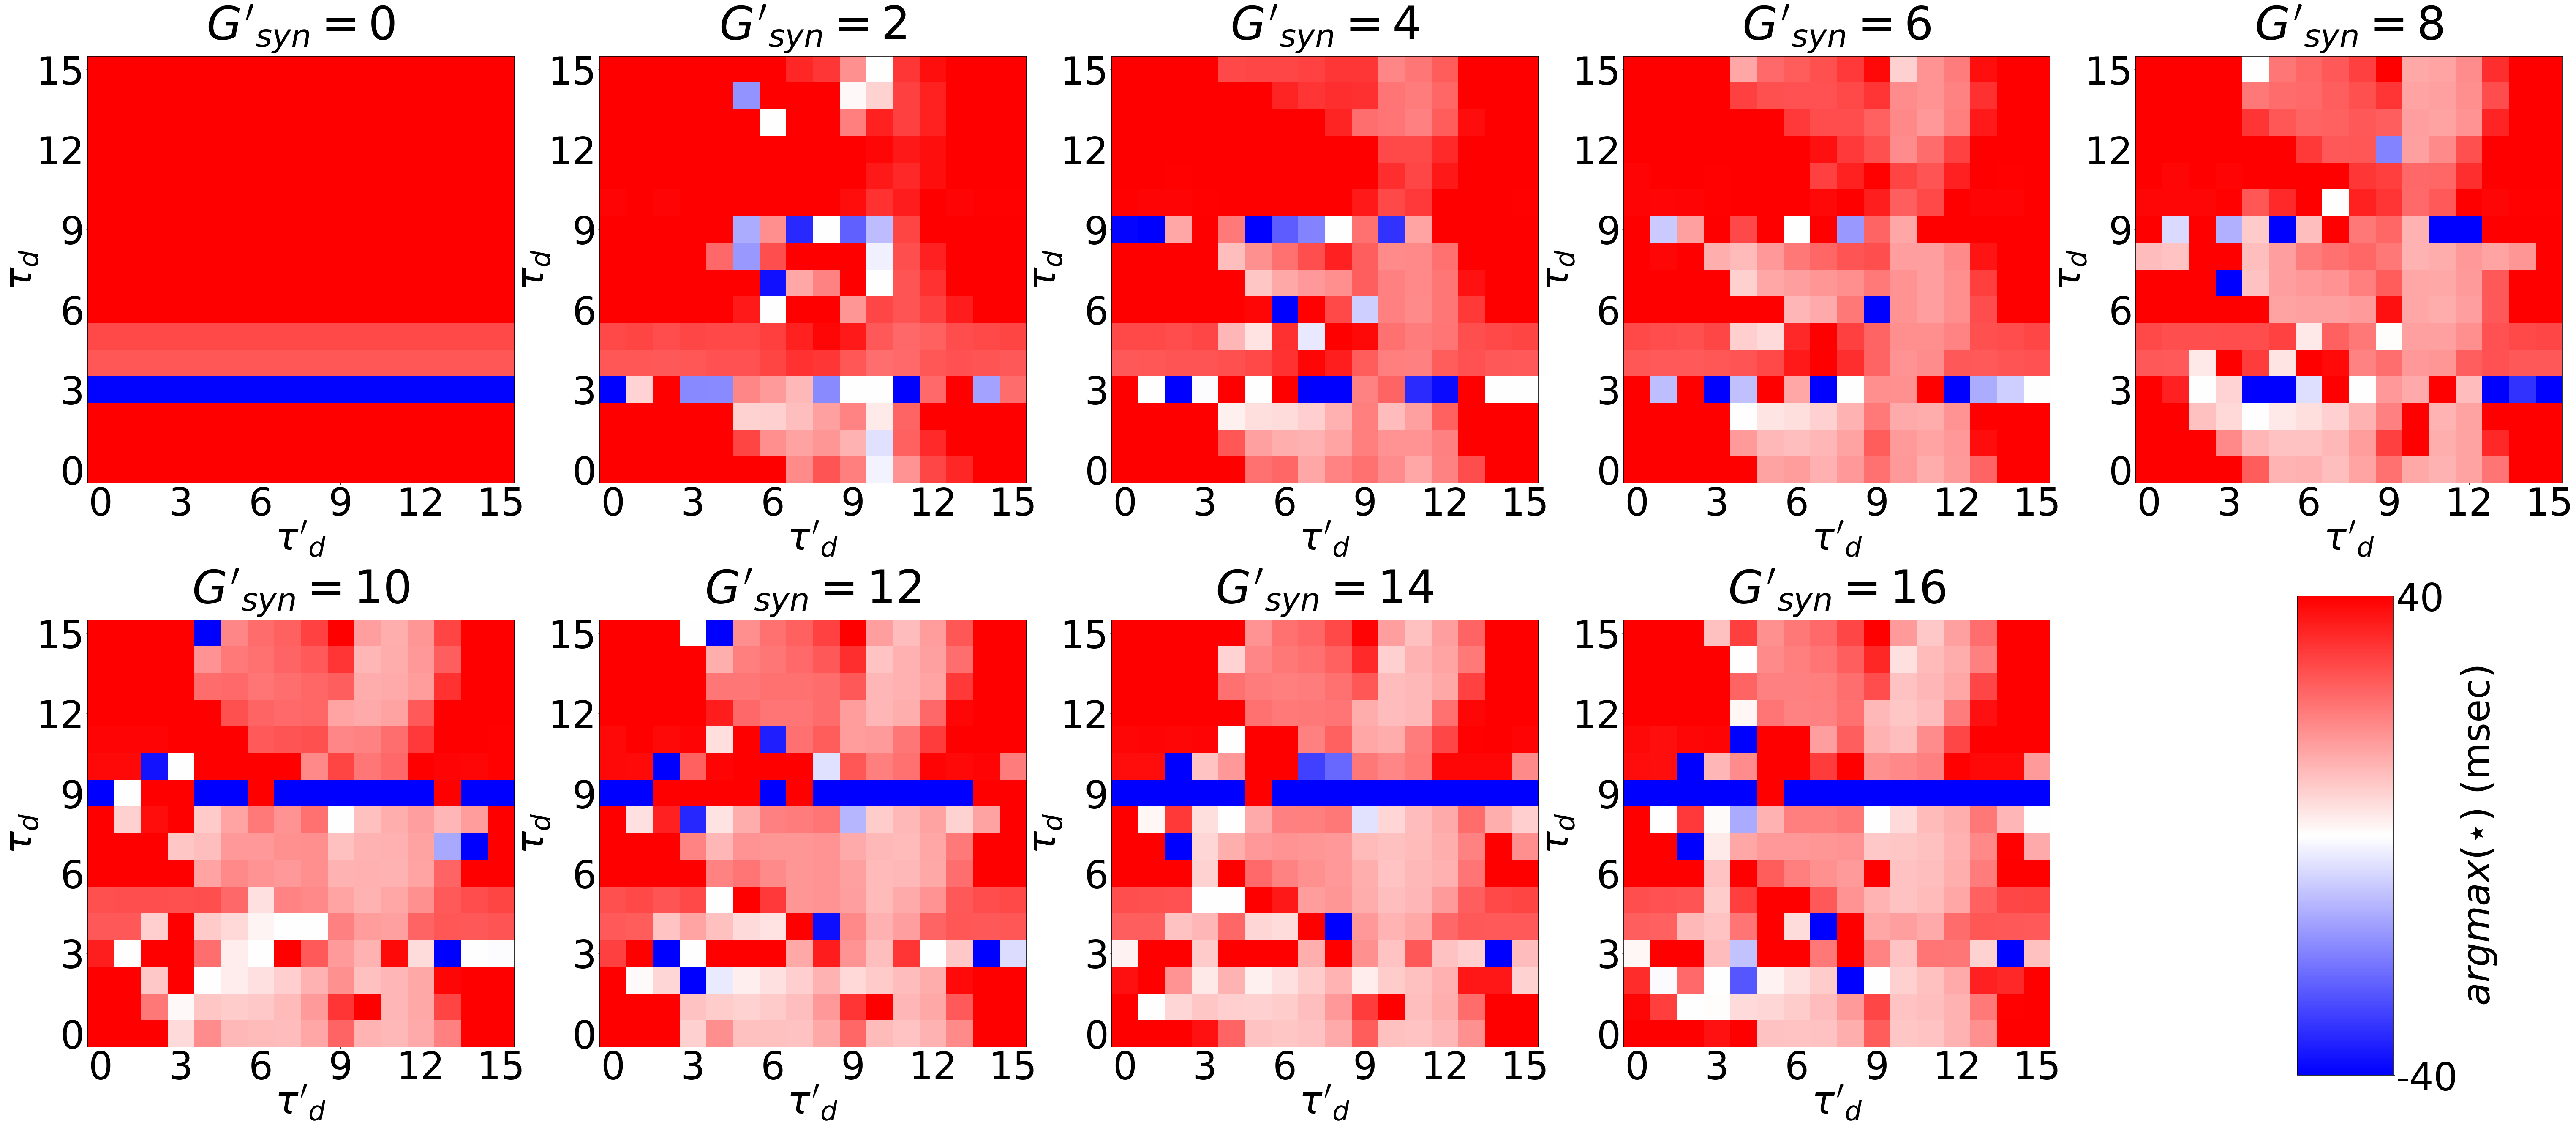

<Figure size 432x288 with 0 Axes>

In [128]:
# 0.control different parameters
# distlim=[0,1] # max of cross-corr
distlim=[-40,40] # argmax between -50 and 50 msec
# cmap = plt.cm.get_cmap("gray_r")
cmap = plt.cm.get_cmap("bwr")
fig = plt.figure(figsize=(105, 45))
axes={}

# 1.plot
for gpi,gprime in enumerate(np.arange(0,18,2)): 
    ri = gpi//5
    ci = gpi%5
    axes[gpi] = plt.subplot2grid((2,5),(ri,ci)) #add axes
    
    l1 = axes[gpi].imshow(argmaxs0[gpi], cmap=cmap, clim=distlim, origin="low")
    axes[gpi].set(xticks=np.arange(0,16,3), yticks=np.arange(0,16,3))
    axes[gpi].set_title(r"$G'_{syn}=%s$"%(gprime), pad=40)
    axes[gpi].set_ylabel(r"$\tau_d$", labelpad=-10)
    axes[gpi].set_xlabel(r"$\tau'_d$", labelpad=-10)

# 2.colorbars and labels
pos = fig.add_axes([0.817, 0.12, 0.03, 0.35])
bar = plt.colorbar(l1, cax=pos, shrink=0.8, ticks=distlim, aspect=10)
# bar.set_label(r"$max(\star)$")
bar.set_label(r"$argmax(\star)$ (msec)")
bar.set_ticklabels(distlim)


plt.rcParams.update({'font.size': 90})
plt.figure().tight_layout()
fig.savefig("info_cirs0_argmax.pdf", bbox_inches="tight")

# 3. relation of sync and comm <a id="syncinfo"></a>

plot phase differences as x-value and max cross-correlaton values as y-values

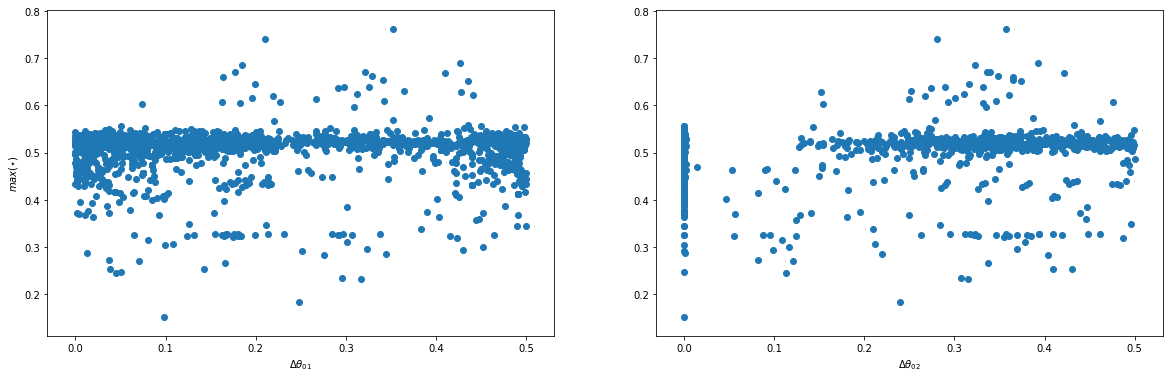

In [64]:
# for x,y in zip(rel01[0,:,0],maxs2[0,:,0]):
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

axes[0].scatter(rel01, maxs2)
axes[0].set(xlabel=r"$\Delta\theta_{01}$", ylabel=r"$max(\star)$")
axes[1].scatter(rel02, maxs2)
axes[1].set(xlabel=r"$\Delta\theta_{02}$")
plt.savefig("sync_info.pdf", bbox_inches="tight")

In [7]:
# get string from a variable name
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

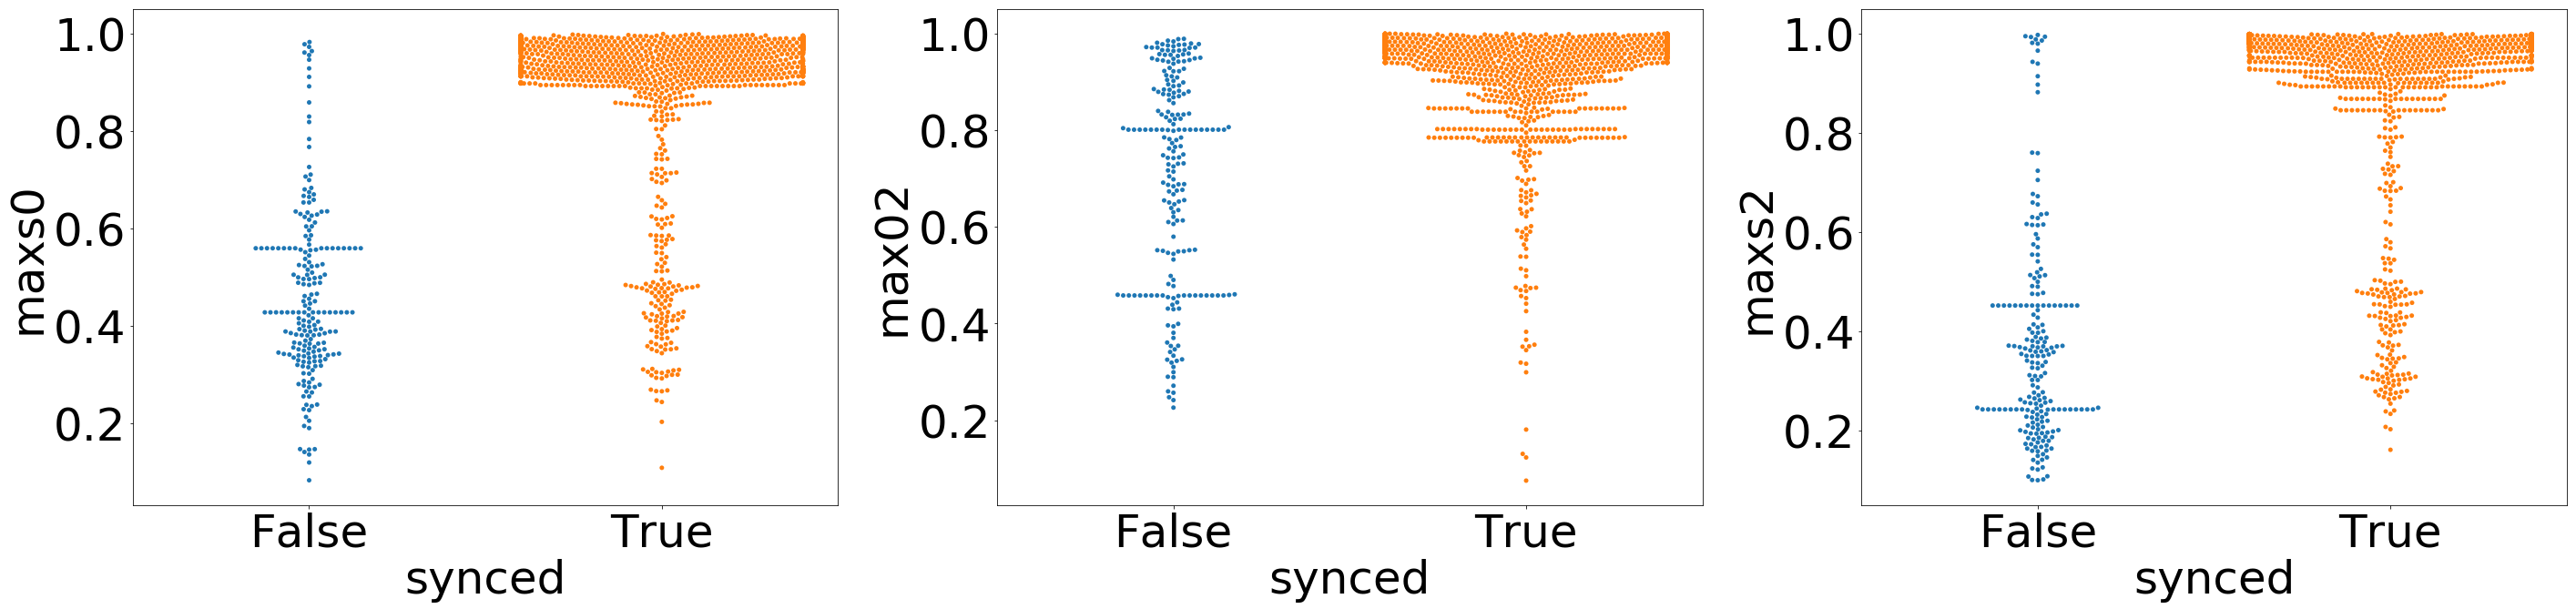

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40,10))
df = pd.DataFrame({"synced":pd.Series((~mask).flatten())})
for index, var in enumerate([maxs0, max02, maxs2]):
    df[retrieve_name(var)[0]] = pd.Series(var.flatten())
    sns.swarmplot(x="synced", y=retrieve_name(var)[0], data=df, ax=axes[index])

plt.rcParams.update({'font.size': 30})
fig.tight_layout()
plt.savefig("sync_vs_ITE.pdf", bbox_inches="tight")

# 4.PRC<a id="PRC"></a>

## One neuron

In [3]:
onePRC=np.load("datas/PRC/datas/onePRC.npy")
onePRCfirst= (onePRC[3] - (onePRC[1][:,:,1]-onePRC[1][:,:,0])) /onePRC[3]

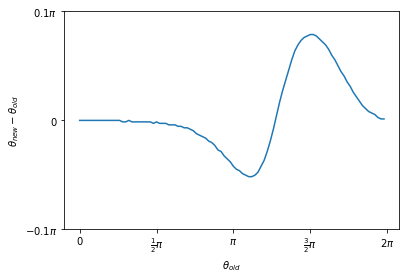

In [16]:
plt.plot(onePRCfirst)
plt.xlabel(r"$\theta_{old}$")
plt.xticks([0,25,50,75,100],["0",r"$\frac{1}{2}\pi$",r"$\pi$",r"$\frac{3}{2}\pi$",r"$2\pi$"])
plt.ylim([-0.05,0.05])
plt.yticks([-0.05,0,0.05],[r"$-0.1 \pi$",r"$0$",r"$0.1 \pi$"])
plt.ylabel(r"$\theta_{new}-\theta_{old}$")
plt.savefig("single_PRC.eps")

## V-motif

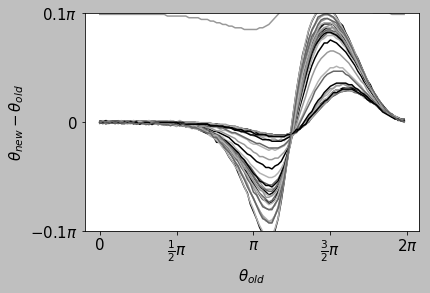

In [13]:
"""PRC of master node in one plot"""
# for t,tau in enumerate(np.arange(3.5,9.1,0.5)):
#     plt.plot(PRCfirst[0,t+7,:,0],"red",alpha=(t+1)/12) 
# for t,tau in enumerate(np.arange(9.5,16.1,0.5)):
#     plt.plot(PRCfirst[0,t+19,:,0],"blue",alpha=(t+1)/14)  #new cycle starts
for t, tau in enumerate(np.arange(0,17,0.5)):
    plt.plot(PRCfirst[0,t,:,0])
plt.xticks([0,25,50,75,100], ["0",r"$\frac{1}{2}\pi$",r"$\pi$",r"$\frac{3}{2}\pi$",r"$2\pi$"])
plt.xlabel(r"$\theta_{old}$")
plt.ylim([-0.05,0.05])
plt.yticks([-0.05,0,0.05], [r"$-0.1 \pi$",r"$0$",r"$0.1 \pi$"])
plt.ylabel(r"$\theta_{new}-\theta_{old}$")
plt.style.use('grayscale')

plt.savefig("PRC_masternode.pdf", bbox_inches="tight")

In [ ]:
fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(50,20))
for t,tau in enumerate(range(16)):
    # axis index and PRCfirst index has to be modified to plot middle vs side side by side.
    ri = t%4
    ci = t//4
    axes[ri][ci].plot(PRCfirst[0,2*t,:,0],"r")
    axes[ri][ci].plot(PRCfirst[0,2*t,:,1],"g")
    axes[ri][ci].plot(PRCfirst[0,2*t,:,2],"b")
    axes[ri][ci].set(xticks=[0,25,50,75,100], xlabel=r"$\theta_{old}$",
        xticklabels=["0",r"$\frac{1}{2}\pi$",r"$\pi$",r"$\frac{3}{2}\pi$",r"$2\pi$"], 
                     ylim=[-0.05,0.05], yticks=[-0.05,0,0.05], 
        ylabel =  r"$\tau_d={}$".format(tau),
                    yticklabels=[r"$-0.1 \pi$",r"$0$",r"$0.1 \pi$"])

    if tau < 2: # hard coded for the first column
        axes[ri][0].set(ylabel =  r"$\tau_d={}$".format(tau) + "\n " r"$\theta_{new}-\theta_{old}$")

matplotlib.rcParams.update({'font.size': 50})
fig.tight_layout()
plt.savefig("datas/PRC/Plot/Comparison/PRC_V.pdf", bbox_tight="inches")

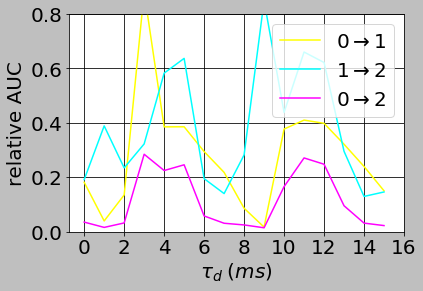

In [52]:
fig, ax = plt.subplots()

ax.plot(range(16), AUC[1,0,np.arange(0,32,2)]/AUC[0,0,np.arange(0,32,2)], "yellow", label=r"$0 \rightarrow 1$")
ax.plot(range(16), AUC[2,0,np.arange(0,32,2)]/AUC[1,0,np.arange(0,32,2)], "cyan", label=r"$1 \rightarrow 2$")
ax.plot(range(16), AUC[2,0,np.arange(0,32,2)]/AUC[0,0,np.arange(0,32,2)], "magenta", label=r"$0 \rightarrow 2$")

ax.set(ylim=[0,0.8], xticks=np.arange(0,17,2), ylabel="relative AUC", xlabel=r"$\tau_d \; (ms)$")

plt.grid()
plt.legend(loc="upper right")
matplotlib.rcParams.update({'font.size': 20})
plt.savefig("PRC_V_AUC.pdf", bbox_inches="tight")